# [NLP] Assignment 1: Tokenization

In this assignment, you need to tokenize the text of the Twitter(X) users posts(tweets). The assignment consists of two tasks. When you finish all the tasks, create a GitHub repository for this assignment (you can use this repo later for the other assignments) and submit this notebook in the repository. Leave `requirements.txt` file if your code requires additional installations. Submit the link to the repository in Moodle.

The [data](https://drive.google.com/file/d/15x_wPAflvYQ2Xh38iNQGrqUIWLj5l5Nw/view?usp=share_link) contains 5 files whereby each contains 44 tweets. Each tweet is separated by a newline.

## Task 1. Tokenize some tweets manually (20 points)

As a first task you need to tokenize first 15 tweets from `file2` by hand. This will allow you to understand the problem from a linguistic point of view. The guidelines for tweet tokenization are as follows:

- Each smiley is a separate token
- Each hashtag is an individual token. Each user reference is an individual token
- If a word has spaces between them then it is converted to a single token
- All punctuations are individual tokens. This includes double-quotes and single quotes also
- A URL is a single token

Example of output

    Input tweet
    @xfranman Old age has made N A T O!

    Tokenized tweet (separated by comma)
    @xfranman , Old , age , has , made , NATO , !

    
    1. Input tweet
    Camping in Maine for the weekend. Hey Dad, Mama Loves YOU: http://www.mamapalooza.com
    1. Tokenized tweet (separated by |)
    Camping | in | Maine | for | the | weekend | . | Hey | Dad | , | Mama | Loves | YOU | : | http://www.mamapalooza.com

    2. Input tweet
    Its american tradition bitch
    2. Tokenized tweet
    Its | american | tradition | bitch

    3. Input tweet
    @ThroughTheVoid They love it! The only pleasure they get in life. I actually do that. I'm sure I hear a tiny squeak... Then louder ones
    3. Tokenized tweet
    @ThroughTheVoid | They | love | it | ! | The | only | pleasure | they | get | in | life | . | I | actually | do | that | . | I | ' | m | sure | I | hear | a | tiny | squeak | ... | Then | louder | ones

    4. Input tweet
    " RT @latti: @AbsoHilare stop tweeting in church! Lol <--- ""I tweet because I'm happy, I tweet because I'm free"" LOL!"
    4. Tokenized tweet
    " | RT | @latti | : | @AbsoHilare | stop | tweeting | in | church | ! | Lol | <--- | " | " | I | tweet | because | I | ' | m | happy | , | I | tweet | because | I | ' | m | free | " | " | LOL | ! | "

    5. Input tweet
    Samsung Mini S2 portable HDD graced with colors that perfectly match your tacky beach gear: Sammy's done it aga.. http://tinyurl.com/lb5p6m
    5. Tokenized tweet
    Samsung | Mini | S2 | portable | HDD | graced | with | colors | that | perfectly | match | your | tacky | beach | gear | : | Sammy | ' | s | done | it | aga | .. | http://tinyurl.com/lb5p6m

    6. Input tweet
    @dialloc congrats on finding your way over. it may be slow going at first. hang in there. it's kinda cool when u get up to speed.
    6. Tokenized tweet
    @dialloc | congrats | on | finding | your | way | over | . | it | may | be | slow | going | at | first | . | hang | in | there | . | it | ' | s | kinda | cool | when | u | get | up | to | speed | .

    7. Input tweet
    iPhone activation delays continue, Apple offers $30 http://twt.gs/l3Ki
    7. Tokenized tweet
    iPhone | activation | delays | continue | , | Apple | offers | $30 | http://twt.gs/l3Ki

    8. Input tweet
    RT @GoogleAtWork Gmail maximum attachment size now 25MB http://bit.ly/62mjw Nice!!!
    8. Tokenized tweet
    RT | @GoogleAtWork | Gmail | maximum | attachment | size | now | 25MB | http://bit.ly/62mjw | Nice | !!!

    9. Input tweet
    RT @acfou The Ads Won Awards for Crispin; But Did Nothing for Client BurgerKing's Sales/Marketshare - Big Surprise - http://ping.fm/vw8TI
    9. Tokenized tweet
    RT | @acfou | The | Ads | Won | Awards | for | Crispin | ; | But | Did | Nothing | for | Client | BurgerKing | ' | s | Sales | / | Marketshare | - | Big | Surprise | - | http://ping.fm/vw8TI |

    10. Input tweet
    Hey doll! Great I missed True Blood yday boo lol Rt @FrankBanuat78 @jhillstephens Hello Sunshine how are u today? :-)
    10. Tokenized tweet
    Hey | doll | ! | Great | I | missed | True | Blood | yday | boo | lol | Rt | @FrankBanuat78 | @jhillstephens | Hello | Sunshine | how | are | u | today | ? | :-)

    11. Input tweet
    Australian artist Pogo made these free songs primarily from sampled audio from Alice In Wonderland. http://www.last.fm/music/Pogo/Wonderland
    11. Tokenized tweet
    Australian | artist | Pogo | made | these | free | songs | primarily | from | sampled | audio | from | Alice | In | Wonderland | . | http://www.last.fm/music/Pogo/Wonderland

    12. Input tweet
    @mppritchard they wanted to sell all the preorders & then sell all of the ones they had in stock to those that just walked in. Can't do both
    12. Tokenized tweet
    @mppritchard | they | wanted | to | sell | all | the | preorders | & | then | sell | all | of | the | ones | they | had | in | stock | to | those | that | just | walked | in | . | Can | ' | t | do | both

    13. Input tweet
    Incoming: Frightened Rabbit, Sept. 22 (Tucson): If Fat Cat Records is going to send three great bands from Scot.. http://tinyurl.com/nz6xcv
    13. Tokenized tweet
    Incoming | : | Frightened | Rabbit | , | Sept | . | 22 | ( | Tucson | ) | : | If | Fat | Cat | Records | is | going | to | send | three | great | bands | from | Scot | .. | http://tinyurl.com/nz6xcv

    14. Input tweet
    Hey @ginoandfran please greet philip! (GinoandFran live > http://ustre.am/2YyQ)
    14. Tokenized tweet
    Hey | @ginoandfran | please | greet | philip | ! | ( | GinoandFran | live | > | http://ustre.am/2YyQ | )

    15. Input tweet
    Ik weet niet wie er achter de T-Mobile iPhone Twitter zit maar ik vind het niet echt 'corporate' taalgebruik... Best vreemd eigenlijk
    15. Tokenized tweet
    Ik | weet | niet | wie | er | achter | de | T-Mobile | iPhone | Twitter | zit | maar | ik | vind | het | niet | echt | ' | corporate | ' | taalgebruik | ... | Best | vreemd | eigenlijk

## Task 2. Implement [Byte-Pair Encoding(BPE)](https://arxiv.org/pdf/1508.07909.pdf) Tokenizer (80 points)

### Task 2.1. Implementation (60 points)

Implement the tokenizer as the BPETokenizer class:
* Implement `train` method that learns merges and builds the vocabulary of the specified `vocab_size` (25 points).
* Implement `tokenize` method that should tokenize the text according to the learnt merges (25 points).

Your code should have docstrings and comments (10 points).

In [132]:
from typing import List
from collections import defaultdict

class BPETokenizer:
    ''' Byte Pair Encoding Tokenizer class for training on a corpus and then tokenizing text '''

    def __init__(self, vocab_size: int) -> None:
        self.vocab_size = vocab_size
        self.vocab = set()
        self.merges = dict()


    def train(self, corpus: List[str]) -> None:
        ''' Train the tokenizer on a corpus of text '''

        # split words into characters and add end-of-word token to each word
        words_split = []
        for sentence in corpus:
            for word in sentence.split():
                words_split.append(list(word) + ['<end>'])

        # initial vocabulary is the set of characters in the words
        self.vocab = set([char for word in words_split for char in word ])

        # merge the most frequent pair of characters in the words until the vocabulary size is reached
        while len(self.vocab) < self.vocab_size:
            pair_freq = self.get_pair_frequency(words_split)
            most_freq_pair = pair_freq[0][0][0] + pair_freq[0][0][1]
            words_split = self.merge_pair(words_split, most_freq_pair)
            self.vocab.add(most_freq_pair)

            # remember the pairs that were merged for future tokenization
            self.merges[pair_freq[0][0]] = most_freq_pair
            

    def _get_pair_frequency(self, words_split: List[List[str]]) -> defaultdict:
        ''' Get frequency of pairs of characters in words '''

        # count the frequency of each consecutive pair of characters in the words
        pair_freq = defaultdict(int)
        for word in words_split:
            for i in range(len(word) - 1):
                pair_freq[(word[i], word[i + 1])] += 1
        pair_freq = sorted(pair_freq.items(), key=lambda x: x[1], reverse=True)
        return pair_freq
        
    def _merge_pair(self, words_split: List[List[str]], pair: str) -> List[List[str]]:
        ''' Merge the most frequent pair of characters in words '''

        new_words_split = []
        for word in words_split:
            # if the whole word is a token, then skip
            if len(word) == 1:
                new_words_split.append(word)
                continue
            
            # find and merge given pair of characters in the word
            new_word = []
            i = 0
            while i < len(word) - 1:
                if word[i] + word[i + 1] == pair:
                    new_word = word[:i] + [pair] + word[(i + 2):]
                    i += 2
                else:
                    i += 1
            new_words_split.append(new_word if new_word else word)

        return new_words_split

    def tokenize(self, text: str) -> List[str]:
        ''' Tokenize text using the trained tokenizer '''

        tokens = []
        for word in text.split():
            # split word into characters and add end-of-word token
            word = list(word) + ['<end>']

            # perform the merges that were learned during training
            for pair, merge in self.merges.items():
                i = 0
                while i < len(word) - 1:
                    if word[i] == pair[0] and  word[i + 1] == pair[1]:
                        word = word[:i] + [merge] + word[(i + 2):]
                    i += 1
            tokens.extend(word)
            
        return tokens

### Task 2.2. Analysis on Tweets Dataset (10 points)

Train the BPE tokenizer on the tweets dataset. Try to tokenize the tweets with the tokenizer of different `vocab_size`. For example, train the BPE tokenizer with `vocab_size` of [base_vocab_size, 250, 500, 750, 1000]. Plot the dependency of the average length of the tokenized tweet by `vocab_size` to analyze how `vocab_size` affects the length of the tokenized tweet on average. Tell what `vocab_size` is preferrable and why.

In [179]:
tweet_train_corpus = []

# first 4 files are used for training
for i in range(1, 5):
    with open(f'file{i}', 'r', encoding='utf8') as f:
        for line in f:
            tweet_train_corpus.append(line.strip())    

tweet_test_corpus = []

# last file is used for testing
with open('file5', 'r', encoding='utf8') as f:
    for line in f:
        tweet_test_corpus.append(line.strip())

In [184]:
def get_avg_length(train_corpus, test_corpus, vocab_sizes):
    ''' Get average token length for a given corpora and vocabulary sizes '''
    
    avg_lengths = []

    for vocab_size in vocab_sizes:
        # train the tokenizer on the training corpus
        bpe = BPETokenizer(vocab_size)
        bpe.train(train_corpus)

        # tokenize the test corpus and calculate the average token length

        length = 0
        for line in test_corpus:
            tokens = bpe.tokenize(line)
            length += len(tokens)

        avg_lengths.append(length / len(test_corpus))

    return avg_lengths


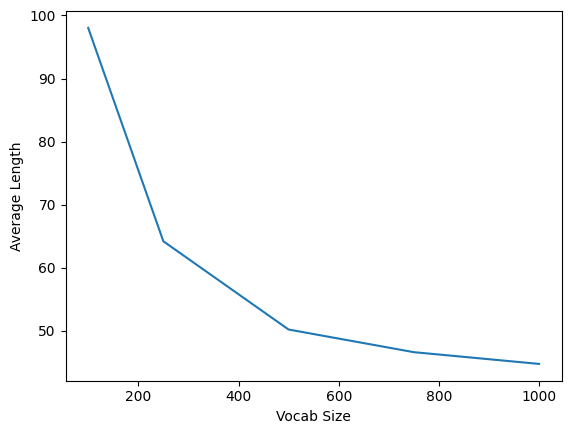

In [186]:
import matplotlib.pyplot as plt

vocab_sizes = [100, 250, 500, 750, 1000]
avg_lengths = get_avg_length(tweet_train_corpus, tweet_test_corpus, vocab_sizes)

plt.plot(vocab_sizes, avg_lengths)
plt.xlabel('Vocab Size')
plt.ylabel('Average Length')
plt.show()


The increase of vocab_size from 100 to 250 and from 250 to 500 leads to a quick drop of average length of tokenized sentence. After that point the decrease is more subtle and likely will continue to progress at a slower rate. However, with higher vocab_size the process of training and tokenization would take more time and memory, so a good vocab_size would be the one that balances these. According to the graph a preferable vocab_size would be roughly 500. 

In [193]:
bpe = BPETokenizer(500)
bpe.train(tweet_train_corpus)
print(bpe.tokenize(tweet_test_corpus[0]))

['M', 'o', 'on', 'fr', 'u', 'it', "'s<end>", 'in', 'v', 'ent', 'i', 've<end>', 'us', 'e<end>', 'of<end>', 't', 'witter<end>', 'for<end>', 's', 'el', 'f', '-', 'pr', 'om', 'o', 't', 'ion', '.<end>', 'http://bit.ly/', '1', '6', 'j', 'V', 'a', 'V', '<end>']


### Task 2.3. Analysis on Dataset of Different Language (10 points)

Find a small dataset of texts in a language other than English. The dataset size should be not greater than several megabytes.

Train the BPE tokenizer on the dataset that you found. Try to tokenize the sentences from this dataset with the tokenizer of different `vocab_size`. Plot the dependency of the average length of the tokenized sentence by `vocab_size` to analyze how `vocab_size` affects the length of the tokenized sentence on average.

Tell how how the average length of the tokenized sentence differs from the average length of the tokenized tweet. Explain why. 

In [182]:
import pandas as pd

data = pd.read_csv('jp_web_sentences.txt', header=None, delimiter='\t', names=['sentence'])

jp_train_corpus = data['sentence'].tolist()[:1000]
jp_test_corpus = data['sentence'].tolist()[1000:1500]

data

,sentence
1,’−テトラキス（オキシラン−２−イルメチル）−３，３’
2,ＯＶＥＲＭＡＮキングゲイナーのパイロットデータ、
3,アスタシア: ほらほら、しっかりして。
4,シースリーフィット レディース スポーツタイツ サポートタイツ フィットネス コンプレッショ...
5,サニーゴ（げんしのちから）→ワニノコ→ヨーギラス（いわなだれ）→ワニノコ（いやなおと）
...,...
9996,なお、黒線は一番蹴られが少ないと思われる。
9997,があるが、「黒豆木」の由来を平成13年の「豆木祈願」改訂版に、既に退会している幹部西谷泰人氏...
9998,黒麹仕込みによるコクのある味に、落ち着いた香りと甘みを感じる、まさに「穏やかさ）」を思わせる...
9999,鼻は効きますが、匂いはそんなに気にならかったです。


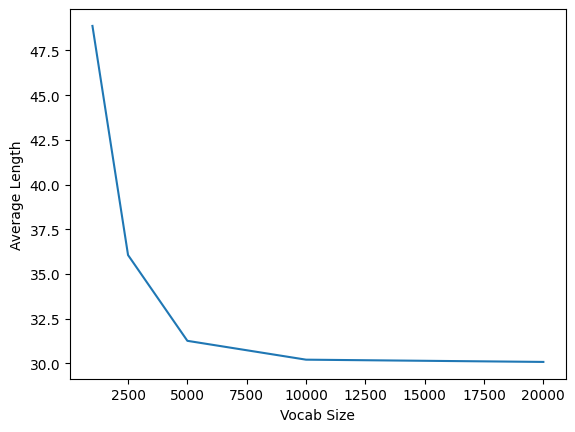

In [188]:
import matplotlib.pyplot as plt

vocab_sizes = [1000, 2500, 5000, 10000, 20000]
avg_lengths = get_avg_length(jp_train_corpus, jp_test_corpus, vocab_sizes)

plt.plot(vocab_sizes, avg_lengths)
plt.xlabel('Vocab Size')
plt.ylabel('Average Length')
iplt.show()

Japanese text requeries much higher vocabulary sizes, mainly because the writing system contains more than 50000 hieroglyphs, unlike the English with just 26 letters. In addition, writing system lowers the average length of sentences (because some words are just 1-2 hieroglyphs). That's why if we tokenize Japanese sentence just by singular symbols on average it will be smaller than English sentence tokenized by Byte-Pair Encoding. However with the increase of vocab_size the time to train and tokenize has risen significantly. If training on English sentences took maximum of 1 minute to run, the Japanese sentences took nearly 15 minutes.

In [200]:
bpe = BPETokenizer(5000)
bpe.train(jp_train_corpus)
print(bpe.tokenize(jp_test_corpus[0]))

['この', '世界', 'には', '多', '数', 'の生', '命', '体', 'が', '存在', 'しています。<end>']
